# Classification of Epileptical Seizures from EEG signals using Deep Learning



In [2]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation , LSTM , Dropout , AveragePooling3D
import pandas as pd

import matplotlib.pyplot as plt

Using TensorFlow backend.


# Data Preprocessing

In [4]:
df=pd.read_csv('data.csv')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [65]:
X=df.values

In [66]:
X=X[:,1:-1]

In [67]:
from sklearn.model_selection import train_test_split


y=np.array(df['y'])
Y=np_utils.to_categorical(y)
Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [93]:
X_train = X_train.reshape(-1,178,1)
X_test = X_test.reshape(-1,178,1)


X_train.shape
X_test.shape

(2300, 178, 1)

#  Intuition of the Epileptical Signal In the Dataset 

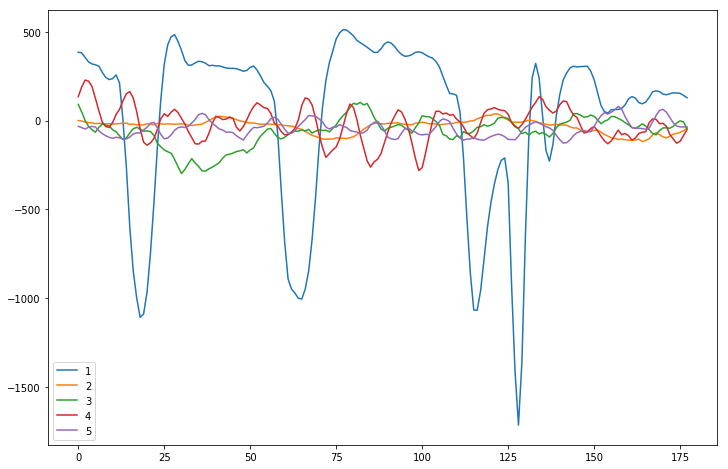

In [119]:
plt.figure(figsize=(12,8))
plt.plot(X[1,:],label='1')
plt.plot(X[7,:],label='2')
plt.plot(X[12,:],label='3')
plt.plot(X[0,:],label='4')
plt.plot(X[2,:],label='5')
plt.legend()
plt.show()

# Creating LSTM Neural Network For the Classification 

In [100]:
model = Sequential()
model.add(LSTM(56, input_shape=(45,1), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(56))
model.add(Dropout(0.3))
model.add(Dense(20))
model.add(Activation('tanh'))
model.add(Dense(5))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_49 (LSTM)               (None, 45, 56)            12992     
_________________________________________________________________
dropout_44 (Dropout)         (None, 45, 56)            0         
_________________________________________________________________
lstm_50 (LSTM)               (None, 56)                25312     
_________________________________________________________________
dropout_45 (Dropout)         (None, 56)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 20)                1140      
_________________________________________________________________
activation_29 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 5)                 105       
__________

In [101]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [102]:
hist = model.fit(((X_train[:,::4]-X_train.mean())/X_train.std()),Y_train[:,1:],validation_data=((X_test[:,::4]-X_test.mean())/X_test.std(),Y_test[:,1:])
                ,epochs = 50, batch_size=15,shuffle=False
                )

Train on 9200 samples, validate on 2300 samples
Epoch 1/50
9200/9200 [==============================] - 47s 5ms/step - loss: 0.3950 - acc: 0.8302 - val_loss: 0.3775 - val_acc: 0.8326
Epoch 2/50
9200/9200 [==============================] - 44s 5ms/step - loss: 0.3658 - acc: 0.8364 - val_loss: 0.3294 - val_acc: 0.8474
Epoch 3/50
9200/9200 [==============================] - 45s 5ms/step - loss: 0.3110 - acc: 0.8519 - val_loss: 0.2850 - val_acc: 0.8574
Epoch 4/50
9200/9200 [==============================] - 44s 5ms/step - loss: 0.2730 - acc: 0.8625 - val_loss: 0.2593 - val_acc: 0.8687
Epoch 5/50
9200/9200 [==============================] - 44s 5ms/step - loss: 0.2563 - acc: 0.8703 - val_loss: 0.2519 - val_acc: 0.8705
Epoch 6/50
9200/9200 [==============================] - 44s 5ms/step - loss: 0.2444 - acc: 0.8740 - val_loss: 0.2423 - val_acc: 0.8762
Epoch 7/50
9200/9200 [==============================] - 44s 5ms/step - loss: 0.2386 - acc: 0.8769 - val_loss: 0.2352 - val_acc: 0.8774
Epoch 8

# Saving The Trained Model

In [115]:
model.save('Epilepsy.h5')

# Visualisations

Graph Between Training Loss and Training Accuracy

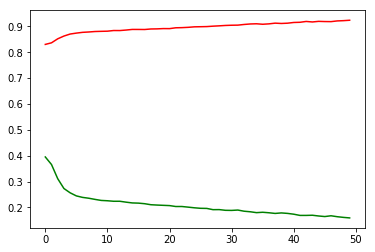

In [117]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['acc'],'r')
plt.show()

Graph Between Validation Loss Function and Validation Accuracy

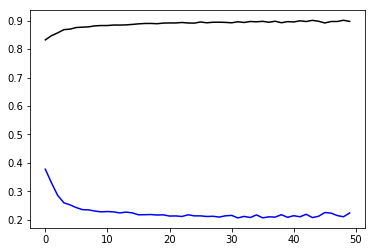

In [118]:
plt.figure(0)
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['val_acc'],'black')
plt.show()
